In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
customer=pd.read_csv("customer.csv")
sales=pd.read_csv("sales.csv")
products=pd.read_csv("products.csv")
df2=sales.merge(products, on='product_id', how='left')
df=df2.merge(customer, on='customer_id', how='left')

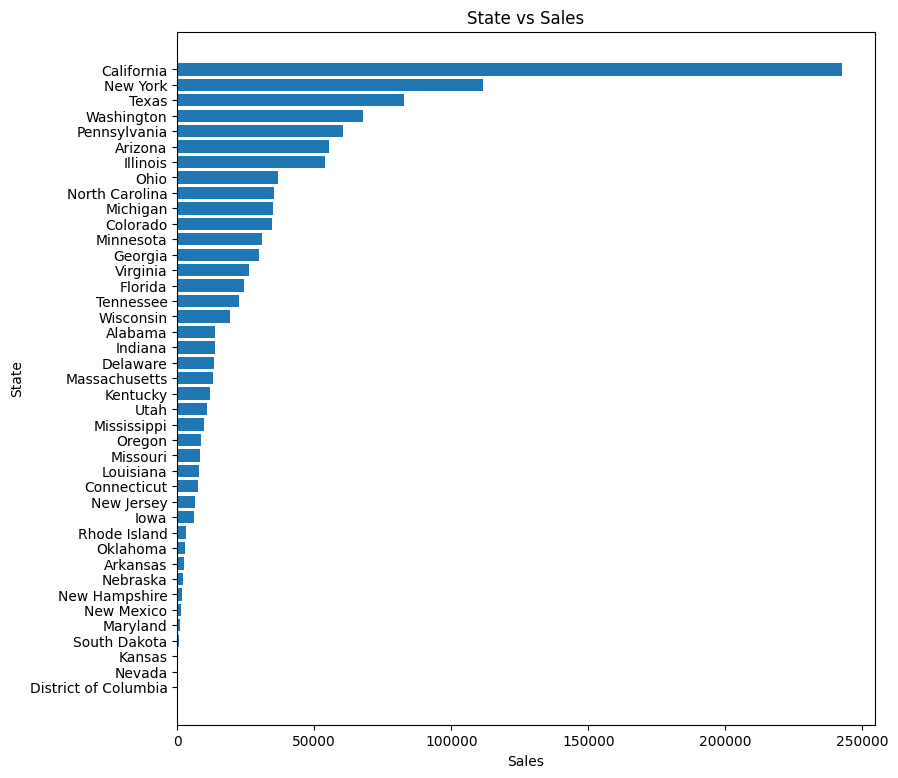

In [5]:
bar = df.loc[:, ['state', 'sales']]

bar_df = bar.groupby('state').sum().reset_index()
bar_df = bar_df.sort_values(by=['sales'])

plt.figure(figsize=(9,9))

plt.barh(bar_df['state'], bar_df['sales'])
plt.title('State vs Sales')

plt.xlabel('Sales')
plt.ylabel('State')

plt.show()



                   sales
category                
Accessories  160126.2459
Clothing     426379.4489
Shoes        530436.9265


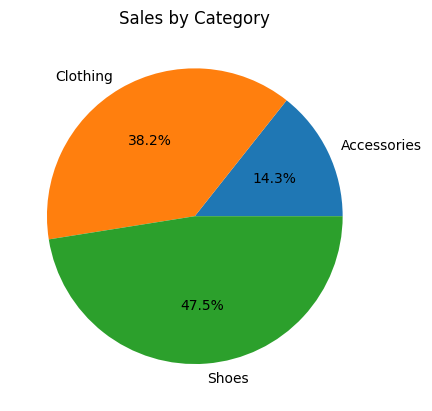

In [6]:
#Task 2

pie_df = df.loc[:, ['category', 'sales']]
pie_df = pie_df.groupby('category').sum()

print(pie_df)

plt.pie(pie_df['sales'], labels=pie_df.index, autopct='%1.1f%%')

plt.title('Sales by Category')

plt.show()

In [7]:
#Task 3

dn_df = df.loc[:, ['payment_mode', 'quantity']]

dn_df = dn_df.groupby('payment_mode').sum().reset_index()

print(dn_df)

    payment_mode  quantity
0  Bank Transfer      5699
1           Cash      5649
2    Credit card      5570
3     Debit Card      5666


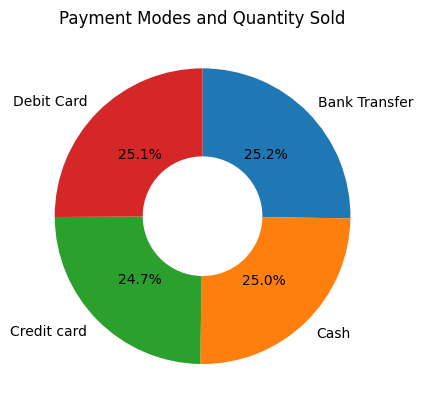

In [8]:
#Task 4
fig, ax = plt.subplots()

labels = dn_df['payment_mode']

sizes = dn_df['quantity']

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'width': 0.7})

circle = plt.Circle((0, 0), 0.4, color='white')

ax.add_artist(circle)

plt.title('Payment Modes and Quantity Sold')

plt.show()

    customer_id        customer_name  quantity
784    WPP-4399        William Brown        93
258    EIC-1982           Emily Phan        91
555    NIC-1732         Noel Staavos        84
268    ENW-6578         Edward Hooks        82
507    MMD-7588  Maribeth Schnelling        82
349    JCM-4112             John Lee        79
590    PGS-5039           Paul Prost        79
676    SDW-9345    Steven Cartwright        77
611    PWM-6328            Pete Kriz        77
172    CPP-8584  Chloris Kastensmidt        77


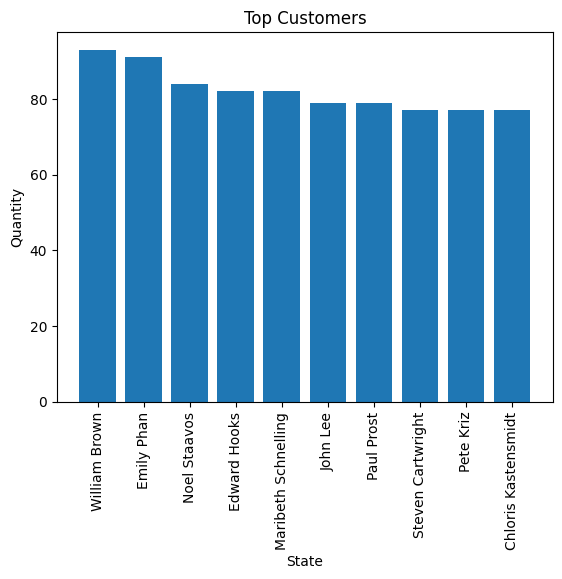

In [9]:
#Task 5
group_data = df.groupby(['customer_id', 'customer_name']).sum()

group_data = group_data.reset_index()

loyal_cust = group_data.loc[:, ['customer_id', 'customer_name', 'quantity']]

top_loyal_cust = loyal_cust.sort_values('quantity', ascending=False).head(10)

print(top_loyal_cust)

plt.bar(top_loyal_cust['customer_name'], top_loyal_cust['quantity'])

plt.xticks(rotation=90) 

plt.title('Top Customers')

plt.xlabel('State')

plt.ylabel('Quantity')

plt.show()


In [10]:
#Task 6

sales_ny = df.loc[df['state'] == 'New York']

subcategory_profit = sales_ny.groupby(['category','sub_category'])['quantity'].sum().reset_index()

subcategories_ranked = subcategory_profit.sort_values(['category', 'quantity'], ascending=False).groupby('category').head(4)

print("The top 4 subcategories for each category, ranked by total quantity sold in New York are:")

print(subcategories_ranked[['category', 'sub_category', 'quantity']])


The top 4 subcategories for each category, ranked by total quantity sold in New York are:
       category           sub_category  quantity
18        Shoes            Women/Shoes       531
13        Shoes              Men/Shoes       430
12        Shoes             Kids/Shoes       156
14        Shoes        Originals/Shoes        73
10     Clothing         Women/Clothing       440
8      Clothing           Men/Clothing       345
7      Clothing          Kids/Clothing        57
6      Clothing    Essentials/Clothing         7
2   Accessories  Originals/Accessories       208
4   Accessories   Training/Accessories        51
5   Accessories      Women/Accessories        43
1   Accessories        Men/Accessories        27


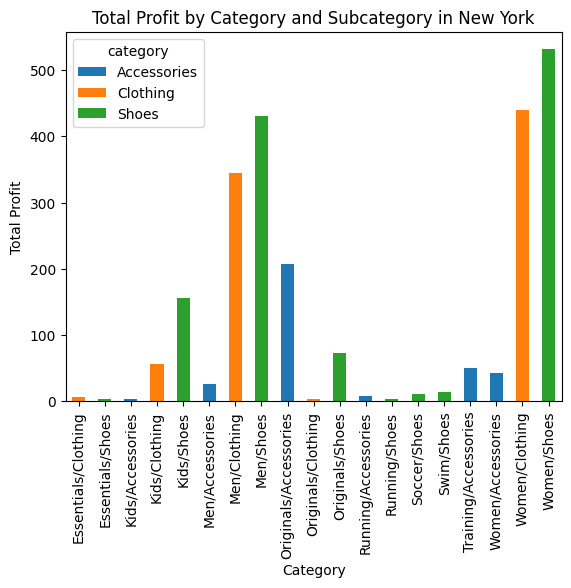

In [11]:
#Task 7 
subcategory_pivot = subcategory_profit.pivot(index='sub_category', columns='category', values='quantity')

subcategory_pivot.plot(kind='bar', stacked=True)

plt.title("Total Profit by Category and Subcategory in New York")

plt.xlabel("Category") 
plt.ylabel("Total Profit")
plt.show()

In [12]:
#Task 8

sales_filtered = df.loc[(df['delivery_mode'] == 'Standard Class') & (df['order_date'] >= '01-01-2019') & (df['order_date'] <= '30-06-2019')]

most_profitable_category = sales_filtered.groupby(['category'])['profit'].sum().idxmax()

sales_by_brand = sales_filtered.loc[sales_filtered['category'] == most_profitable_category].groupby(['brand_name'])['sales'].sum().reset_index()

top_brands = sales_by_brand.sort_values('sales', ascending=False).head(2)

print("Top 2 Brands with the highest total sales value for the products belonging to the most profitable category:")

print(top_brands)

Top 2 Brands with the highest total sales value for the products belonging to the most profitable category:
  brand_name        sales
1     adidas  159016.4715
0       Nike   93619.7720


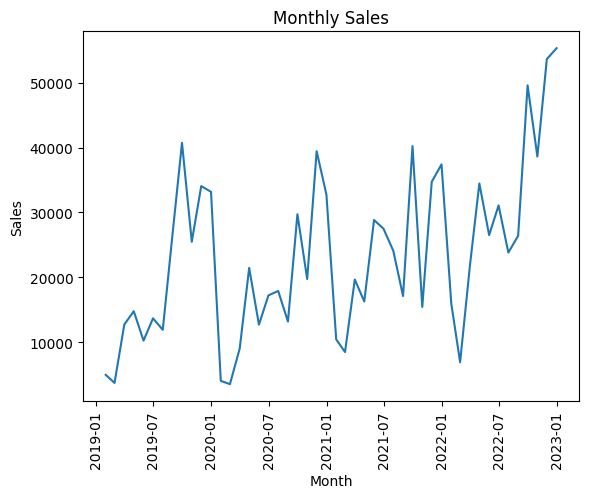

In [13]:
#Task 9
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')

monthly_sales = sales.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()

plt.plot(monthly_sales['order_date'], monthly_sales['sales'])

plt.xlabel('Month')

plt.xticks(rotation=90)

plt.ylabel('Sales')

plt.title('Monthly Sales')

plt.show()

In [29]:
# Task 10
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')

f_df = sales.loc[:, ['order_date', 'sales']]

forecast_df = f_df.groupby(['order_date'])['sales'].sum().reset_index()

forecast_df = forecast_df.sort_values(by='order_date')

print(forecast_df)

print(forecast_df.columns)

     order_date     sales
0    2019-01-03     2.214
1    2019-01-04   194.736
2    2019-01-05    21.184
3    2019-01-06   254.440
4    2019-01-07    43.260
...         ...       ...
1247 2022-12-26    51.750
1248 2022-12-27   128.058
1249 2022-12-28  1100.668
1250 2022-12-29  2291.884
1251 2022-12-30   185.650

[1252 rows x 2 columns]
Index(['order_date', 'sales'], dtype='object')


/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/labsuser/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

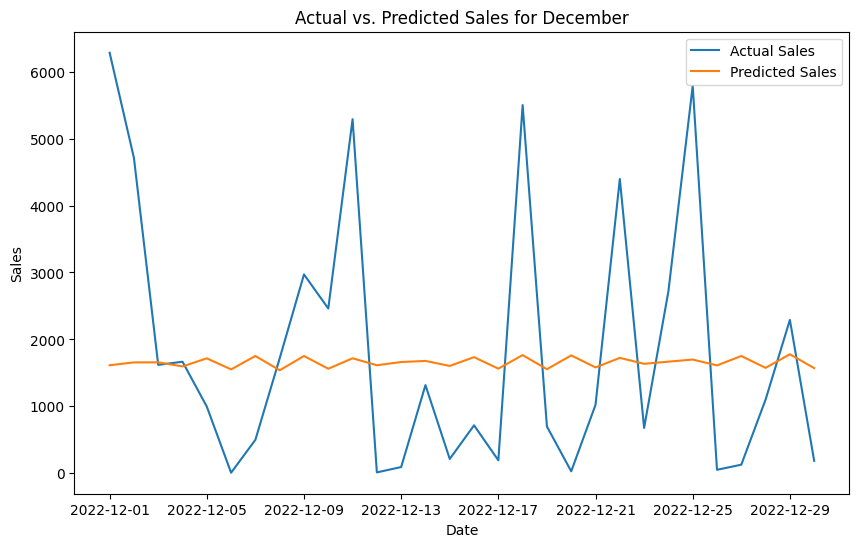

In [30]:
# Task 11
forecast_df.set_index('order_date', inplace=True)

train_size = int(forecast_df.shape[0] - 30)

train = forecast_df[0:train_size]

test = forecast_df[train_size:]

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train["sales"], order=(2, 2, 5))

model_fit = model.fit()

forecast_values = model_fit.get_forecast(steps=30)

forecasted_sales = forecast_values.predicted_mean

forecasted_index = pd.date_range(start=train.index[-1] + pd.DateOffset(days=1), periods=len(forecasted_sales))

actual_values = test['sales']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label='Actual Sales')
plt.plot(forecasted_index, forecasted_sales, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales for December')
plt.legend()
plt.show()